<a href="https://colab.research.google.com/github/akanksha0911/Week6_ML/blob/main/Consolidated_ML_Week6_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The main objective of the colab is to:**

# **Predict the result of the match**


**Project Statement:**

Football is a very popular game worldwide. It was invented in England in the nineteenth century and  is now played by more than 240 million people according to International Federation of Association Football. 

Also known as soccer in some countries, the motivation for this project is inspired from an opportunity to work with a large database of football data. This data was provided by BBC , ESPN, and several other sport new channel through web scraping. 

Two main datasets were used. The first dataset was chosen because it has the highest level of detail and the lowest levels of missing values and erroneous data. The second dataset includes all matches played in six European countries, including Portugal, for 5 years spanning from 2012 to 2017. 

In this collab, we explore the data mining process wherein we apply several Data Mining techniques to the chosen datasets to identify and discover existing patterns. 


### This colab contains various interactIve Dashboard features to change the data distribution along with multiple visualization charts, graphs to show the confusion matrix, f1 score, model performance. 
### It also contains various feature importance techniques used along with using smote for data sampling to upscale or downscale the data.
### Various Regression and Classification alogithms are applied to the dataset and their accuracy is compared.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import time

In [ ]:
game_url_2018_2019 ="https://datahub.io/sports-data/english-premier-league/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/english-premier-league/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/english-premier-league/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/english-premier-league/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/english-premier-league/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/english-premier-league/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/english-premier-league/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/english-premier-league/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/english-premier-league/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/english-premier-league/r/9.csv"

In [ ]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
data = pd.concat(frames,ignore_index=True)
data.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,E0,11/08/2018,Watford,Brighton,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E0,11/08/2018,Wolves,Everton,2,2,D,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E0,12/08/2018,Arsenal,Man City,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,E0,12/08/2018,Liverpool,West Ham,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,E0,12/08/2018,Southampton,Burnley,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Dropping the coloums which are not useful for the analysis.**

In [ ]:
data.drop(columns= ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee'], inplace= True)

### **Encoding the categorical features including target**

In [ ]:
one_hot_encode_cols = data.dtypes[data.dtypes == object]
one_hot_encode_cols

FTR    object
HTR    object
dtype: object

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T

,0,1,2,3,4
FTR,H,H,A,A,A
HTR,H,H,A,A,A


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FTHG      3800 non-null   int64  
 1   FTAG      3800 non-null   int64  
 2   FTR       3800 non-null   object 
 3   HTHG      3800 non-null   int64  
 4   HTAG      3800 non-null   int64  
 5   HTR       3800 non-null   object 
 6   HS        3800 non-null   int64  
 7   AS        3800 non-null   int64  
 8   HST       3800 non-null   int64  
 9   AST       3800 non-null   int64  
 10  HF        3800 non-null   int64  
 11  AF        3800 non-null   int64  
 12  HC        3800 non-null   int64  
 13  AC        3800 non-null   int64  
 14  HY        3800 non-null   int64  
 15  AY        3800 non-null   int64  
 16  HR        3800 non-null   int64  
 17  AR        3800 non-null   int64  
 18  B365H     3800 non-null   float64
 19  B365D     3800 non-null   float64
 20  B365A     3800 non-null   floa

Check Shape of the data

In [ ]:
data.shape

(3800, 72)

In [ ]:
categorical_features = ["HTR"]
X = data[categorical_features]

colum_transformer = ColumnTransformer([('categorical', OneHotEncoder(), categorical_features),], remainder='passthrough')

data['HTR'] = colum_transformer.fit_transform(X)

Traget coloumn

In [ ]:
data["FTR"].value_counts()

H    1758
A    1102
D     940
Name: FTR, dtype: int64

# **Univariate Analysis**

Count FTR (*Full Time Result*) for each outcome.

Text(0, 0.5, 'Count')

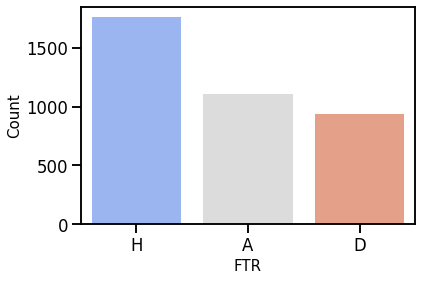

In [ ]:
sns.set_context('talk', font_scale = 1)
sns.countplot(data=data,x="FTR",palette="coolwarm",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

**Observations:**

1. Just By looking at the Counts we can get the Understanding that the Home team has Significantly more wins.
2. Another way of looking at is Away Team is more likely to get a Draw or a loss more often
3. Looking at this it looks like Playing at home is a big advantage.

**Probability Density Function(PDF)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

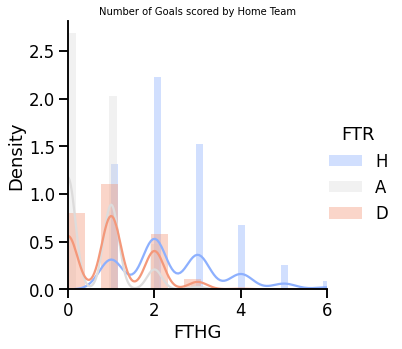

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

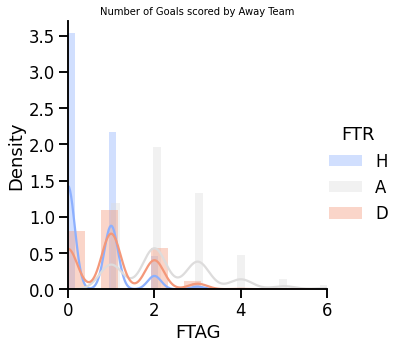

In [ ]:
sns.FacetGrid(data,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.distplot,"FTHG") \
   .add_legend()
plt.title("Number of Goals scored by Home Team",size=10,color= "Black")
plt.show()

sns.FacetGrid(data,height=5,hue="FTR",palette="coolwarm",xlim=(0,6)) \
   .map(sns.distplot,"FTAG") \
   .add_legend()
plt.title("Number of Goals scored by Away Team",size=10,color= "Black")
plt.show()

**Observations:**

1. Most of the times, Both Home and Away Team scores 1 goal, Frequent scores are (1,0,2 in this sequence).Away team slightly ahead here.
2. However, When it come to more than 2 goals, Home Teams are ahead.

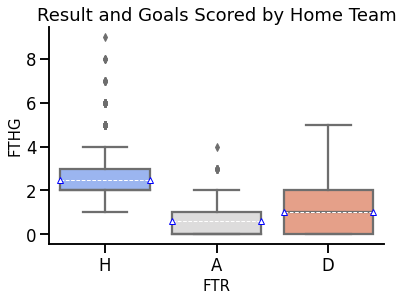

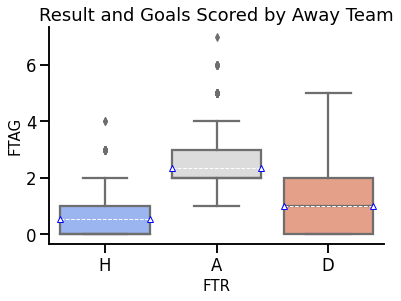

In [ ]:
sns.boxplot(data=data,x="FTR",y="FTHG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=data,x="FTR",y="FTAG",palette="coolwarm", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
sns.despine()
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

***Observations:***

**Home Team :**
1. While winning score mean of 2.5 Goals.
2. When Drawn mean is 0.9 Goals
3. When Lost Mean is 0.5 Goals

**Away Team :**

1. 1.While winning score mean of 2.1 Goals.
2. 2.When Drawn mean is 0.9 Goals.
3. When Lost Mean is 0.6 Goals
-> Overall Home Team is Scoring more goals, While will be a huge factor in winning the game.

# **Bi-Variate analysis**


Perform Pair Plot analysis to visualize the relationship between features.

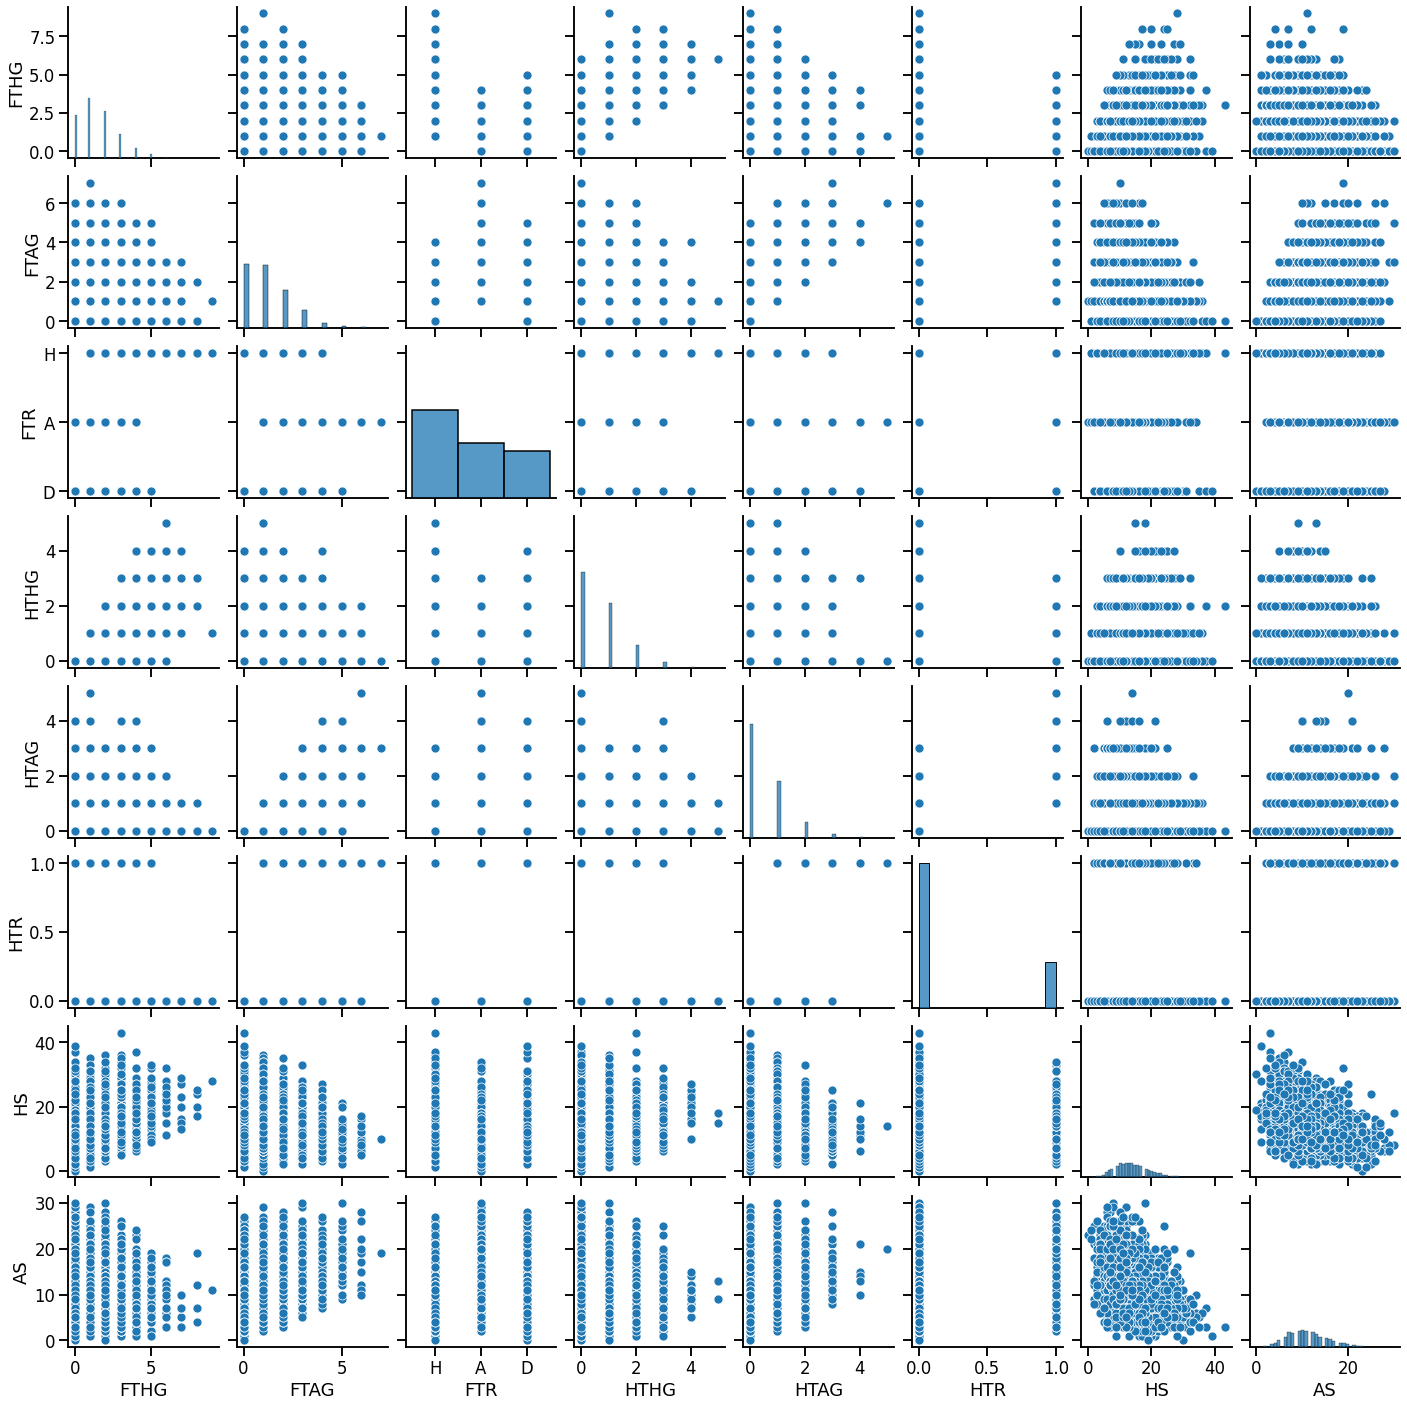

In [ ]:
sns.pairplot(data, vars=["FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS"])

**Observations:**

FTHG *(Full time Home Goal)* and FTAG *(Full time Away Goal)* are the values which clearly indicate who will win. 
So studying these 2 variables can be the best way to to predict FTR.

Whichever faeture has higher value that team wins which translates to the team which score more Goals at Full Time wins the match.

Basicall this is how football works.

Lets Visualize to check if a team is Winning at Half Time or does it Change at Full Time

Text(0, 0.5, 'Count')

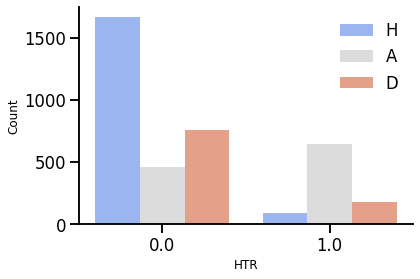

In [ ]:
sns.countplot(data=data,x="HTR",hue="FTR",palette="coolwarm")
plt.legend(edgecolor="White",facecolor="White")
sns.despine()
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")

**Understanding:**


H : Shows the Home team leading at Half Time.

A : Shows the Away team leading at Half Time.

D : Shows the game was level at Half Time.

Blue Bar shows the team went on to Win.

Orange Bar shows the team went on and Drew the game.

Green Bar shows the team Lost the game at Full time.

**Observation:**


1. The team Leading at Half Time almost always goes on to win the game at Full time.

2. If the game is level at Half Time it is more likely Home team will win than the Away team. Although the most likely outcome is a Draw only.

3. So HTR is a very important variable to determine who wins at Full time.

**Conclusion**:

1. There is a Higher percentage of Home team winning, so clearly the team playing at Home has an advantage.
2. Goals Scored at Full time (FTHG - *Home Goals*, FTAG - *Away Goals*) determine FTR - *Full Time Result* i.e. which team will go on to win the game, team which score more Goals at FT wins the match.
3. The Home team usually score more goals. Ex While winning Home team score mean of 2.5 Goals as compared to 2.1 Goals by Away team while winning.
4. HTR (*Half Time Result*) is a very important variable to determine who wins at Full time. As we saw the Team winning at Half team does not usually end up Losing at Full time. So this Variable can effectively predict who is likely to win at full time.

#**Data Prepartion - Train and Test Dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder

target_labelencoder = LabelEncoder()

data['target_cat'] = target_labelencoder.fit_transform(data['FTR'])

data.info

<bound method DataFrame.info of       FTHG  FTAG FTR  HTHG  HTAG  HTR  HS  AS  HST  AST  ...   GBH   GBD  \
0        2     1   H     1     0  0.0   8  13    6    4  ...   NaN   NaN   
1        2     0   H     1     0  0.0  12  10    4    1  ...   NaN   NaN   
2        0     2   A     0     1  1.0  15  10    6    9  ...   NaN   NaN   
3        0     3   A     0     2  1.0   6  13    1    4  ...   NaN   NaN   
4        1     2   A     1     2  1.0  15  15    2    5  ...   NaN   NaN   
...    ...   ...  ..   ...   ...  ...  ..  ..  ...  ...  ...   ...   ...   
3795     1     0   H     0     0  0.0  21  10   13    4  ...  1.30  5.00   
3796     0     0   D     0     0  0.0  11  19    6    7  ...  6.00  3.75   
3797     4     0   H     2     0  0.0  18   4   13    4  ...  1.12  8.00   
3798     1     1   D     1     1  0.0  12  17    8    6  ...  3.75  3.50   
3799     2     1   H     1     1  0.0  14  11    7    5  ...  2.35  3.25   

        GBA   BSH   BSD    BSA   SBH   SBD    SBA  targ

In [ ]:
target_names = ['H','A','D']

In [ ]:
y = data['target_cat'].values

In [ ]:
data.drop(columns = ['FTR'], inplace=True)

In [ ]:
data.shape

(3800, 72)

In [ ]:
data = data.replace(np.nan, 0)

In [ ]:
data

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,...,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA,target_cat
0,2,1,1,0,0.0,8,13,6,4,11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
1,2,0,1,0,0.0,12,10,4,1,11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
2,0,2,0,1,1.0,15,10,6,9,9,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,0,3,0,2,1.0,6,13,1,4,9,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,1,2,1,2,1.0,15,15,2,5,11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,0,0,0.0,21,10,13,4,12,...,1.30,5.00,9.00,1.30,5.00,10.00,1.29,5.00,8.50,2
3796,0,0,0,0,0.0,11,19,6,7,15,...,6.00,3.75,1.55,6.00,3.75,1.57,6.00,3.75,1.50,1
3797,4,0,2,0,0.0,18,4,13,4,10,...,1.12,8.00,19.00,1.11,7.50,23.00,1.11,7.50,15.00,2
3798,1,1,1,1,0.0,12,17,8,6,12,...,3.75,3.50,1.90,4.20,3.60,1.80,4.00,3.40,1.80,1


### **Adding the Latent variables**

**Latent Variable# 1**

The Total Shots Ratio (TSR) is used to determine how well teams fare in a match when it comes to taking and conceding shots.

The TSR is determined by the following formula:

TSR = $\frac{Total shots for}{Total shots for + total shots against}$


In [ ]:
data["TSR"] = data["HS"] / (data["HS"] + data["AS"])

**Latent Variable# 2**

Home Hit Rate is used to determines the rate at which home teams serves a goal against shots played.

The HHR is determined by the following formula:

Home Hit Rate = $\frac{Full Time Home Goal}{Home Shots}$

In [ ]:
data["HHR"] = data["FTHG"]/data["HS"]

**Latent Variable# 3**

Away Hit Rate is used to determine the rate at which away teams serves a goal against shots played.

The AWR is determined by the following formula:

Away Hit Rate = $\frac{Full Time Away Goals}{Away Shots}$

In [ ]:
data["AHR"] = data["FTAG"]/data["AS"]

In [ ]:
data.drop(columns=["HS","AS"], inplace=True)


In [ ]:
y.shape

(3800,)

### **Distrubution of classes** 

Class=2, n=1758 (46.263%)
Class=0, n=1102 (29.000%)
Class=1, n=940 (24.737%)


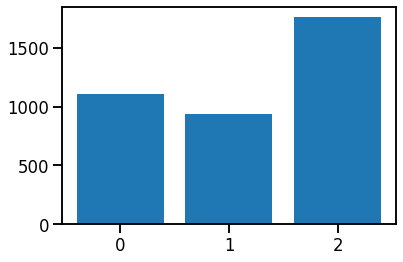

In [ ]:
# summarize distribution
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# **feature importance analysis and selection using SHAP**

In [ ]:
!pip install shap


     |████████████████████████████████| 564 kB 2.7 MB/s 


In [ ]:
import shap

In [ ]:
from shap import TreeExplainer
from shap import summary_plot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=42, stratify = y)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')



X_train: (2850, 73), y_train: (2850,), X_test: (950, 73), y_test: (950,)


In [ ]:
X_train = X_train.replace(np.nan, 0)
X_test =  X_test.replace(np.nan, 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)
explainer = TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

(3, 2850, 73)


3 : number of classes. 

2850 : number of datapoints. We have local SHAP values per datapoint.

73 : number of features. We have SHAP value per every feature.

In [ ]:
print(shap_values[0].shape)

(2850, 73)


2850: SHAP values for every datapoint

73: SHAP value contributions for every feature



Finally, we can run a sanity check to make it sure real predictions from model are the same as those predicted by shap.

To do so, we'll (1) swap the first 2 dimensions of shap_values, (2) sum up SHAP values per class for all features, (3) add SHAP values to base values:

In [ ]:
shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    clf.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
)

True

Then you may proceed to summary_plot that will show feature rankings based on SHAP values on a per class basis. For class 3 this will be:

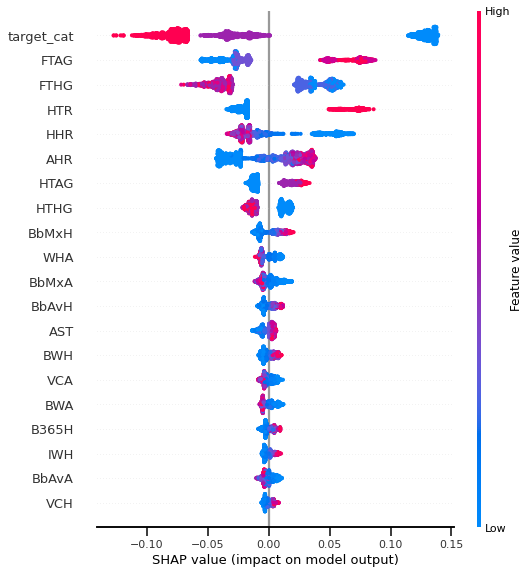

In [ ]:
summary_plot(shap_values[0],X_train)

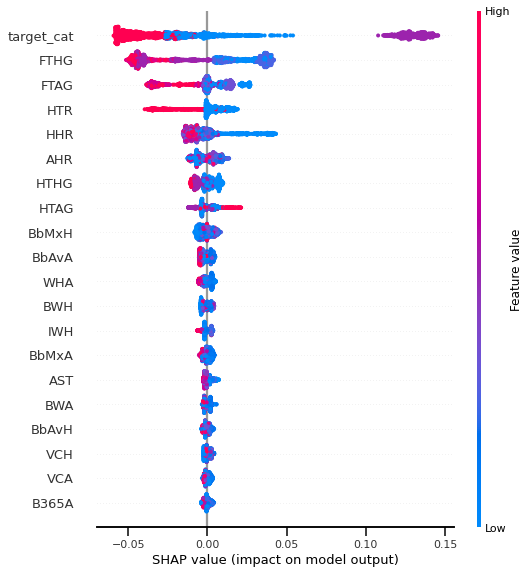

In [ ]:
summary_plot(shap_values[1],X_train)

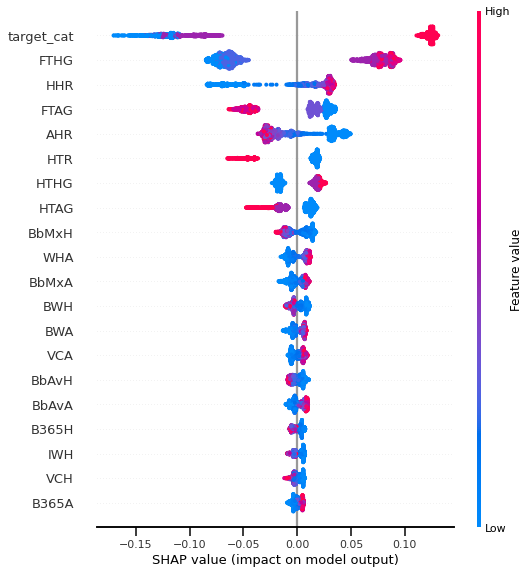

In [ ]:
summary_plot(shap_values[2],X_train)

In [ ]:
#Predicting on test
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[275   0   1]
 [  8 184  43]
 [  0   0 439]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       276
           1       1.00      0.78      0.88       235
           2       0.91      1.00      0.95       439

    accuracy                           0.95       950
   macro avg       0.96      0.93      0.94       950
weighted avg       0.95      0.95      0.94       950



# **Explaining data with Dashboard**

In [ ]:
df = data[["FTHG","FTAG","HTHG","HTAG","HTR","HHR", "AHR", "TSR"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42, stratify = y)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')



X_train: (2850, 8), y_train: (2850,), X_test: (950, 8), y_test: (950,)


In [ ]:
X_train = X_train.replace(np.nan, 0)
X_test =  X_test.replace(np.nan, 0)

In [ ]:
!pip install explainerdashboard

**Regression Dashboard**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from explainerdashboard.datasets import feature_descriptions
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer

model = RandomForestRegressor(n_estimators=50, max_depth=10).fit(X_train, y_train)
explainer = RegressionExplainer(model, X_test, y_test,target='FTR')
ExplainerDashboard(explainer,width=1000, height=800).run(mode='inline')


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard

<IPython.core.display.Javascript object>

**Classifier Dashboard**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard.datasets import feature_descriptions
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer
model = RandomForestClassifier(n_estimators=50, max_depth=10).fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test,target='FTR',labels=['H', 'A', 'D'])
ExplainerDashboard(explainer,width=1000, height=800).run(mode='inline')

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setti

<IPython.core.display.Javascript object>

# **SMOTE Sampling**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
np.bincount(y_res)

array([1319, 1319, 1319])

Class=0, n=1319 (33.333%)
Class=2, n=1319 (33.333%)
Class=1, n=1319 (33.333%)


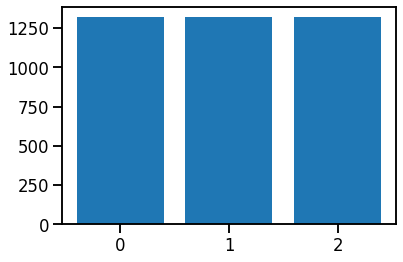

In [ ]:
# summarize distribution
counter = Counter(y_res)
for k,v in counter.items():
	per = v / len(y_res) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

**Prediction after sampling**

In [ ]:
from sklearn.metrics import classification_report

clf1 = RandomForestClassifier(n_estimators=100, max_depth=3)
#Fitting the training data
clf1.fit(X_res, y_res)
#Predicting on test
y_pred1=clf1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[265  11   0]
 [  8 219   8]
 [  2  40 397]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       276
           1       0.81      0.93      0.87       235
           2       0.98      0.90      0.94       439

    accuracy                           0.93       950
   macro avg       0.92      0.93      0.92       950
weighted avg       0.93      0.93      0.93       950



# **Regression**

Implement **Muller Loop** to run the training dataset against - "MLPRegressor", "LinearRegression", "RandomForestRegressor","KNNRegressor", "LogisticRegression", "AdaBoost" and display their accuracy.

In [ ]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100)]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_res, y_res)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regression  Classifier = MLPRegressor, Score (test, accuracy) = 99.67, Training time = 1.24 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 73.90, Training time = 0.01 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 80.68, Training time = 0.32 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 99.49, Training time = 0.02 seconds
Regression  Classifier = LogisticRegression, Score (test, accuracy) = 100.00, Training time = 0.09 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 85.73, Training time = 0.54 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = LogisticRegression, Score (test, accuracy) = 100.00


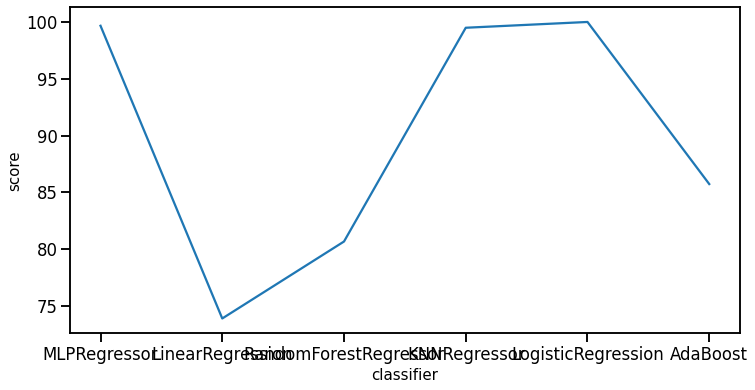

In [ ]:

from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(12,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

### **Classification**

Implementing Muller Loop to run it on the training dataset against following algorithms:

1.   NaiveBayes Classifier
2.   KNN Classifier
3.   RandomForest Classifier
4.   XGB Classifier
5. DecisionTreeClassifier

In [ ]:
class_algo = ["DecisionTreeClassifier", "RandomForest Classifier","KNN Classifier", 
         "NaiveBayes Classifier", 
         "XGB Classifier", ]

classifiers = [
    DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    ]

max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for algo, clf in zip(class_algo, classifiers):
    start_time = time.time()
    clf.fit(X_res, y_res)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(algo)
    print('Classification  Algorithm = %s, Score (test, accuracy) = %.2f,' %(algo, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = algo


Classification  Algorithm = DecisionTreeClassifier, Score (test, accuracy) = 99.47, Training time = 0.01 seconds
Classification  Algorithm = RandomForest Classifier, Score (test, accuracy) = 99.47, Training time = 0.31 seconds
Classification  Algorithm = KNN Classifier, Score (test, accuracy) = 99.16, Training time = 0.04 seconds
Classification  Algorithm = NaiveBayes Classifier, Score (test, accuracy) = 75.68, Training time = 0.01 seconds
Classification  Algorithm = XGB Classifier, Score (test, accuracy) = 99.47, Training time = 0.60 seconds


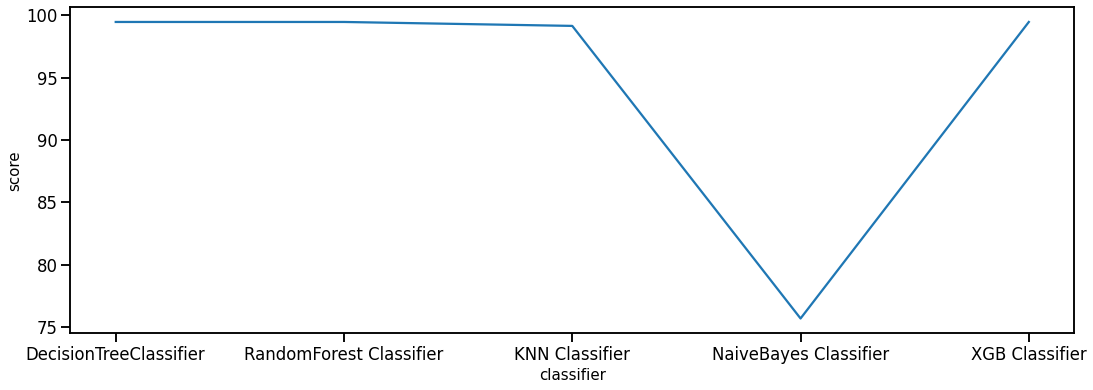

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");